In [1]:
from sklearn import datasets
iris = datasets.load_iris() #загрузили данные для IRIS

In [2]:
#iris - словарик, в котором лежат не только данные, но и значения классов, фрейм, названия циклов, словесное описание 
#Здесь мы вытащили только данные (таблицу)
X = iris.data

from sklearn.preprocessing import MinMaxScaler
#Здесь мы масштабируем. Ведь данные в разных форматах 
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#Инициализируем y значениями классов 
y = iris.target 

#Разделение dataset’а на тренировочную выборку и на тестовую выборку
from sklearn.model_selection import train_test_split

#0, потому что мы хотим одинаковые данные на разных компьютерах (воспроизводимость)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

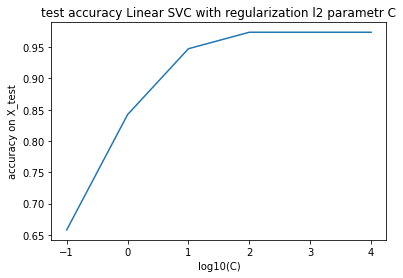

In [3]:
#Cоздание линейного классификатора, подбор регуляционного параметра 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
C_vals = np.array([0.1, 1.0, 10.0, 100.0, 1e3, 1e4])
C_results = []
for C in C_vals:
    clf = LinearSVC(random_state=0, penalty='l2', C=C,  max_iter=10**6, tol=1e-3)
    clf.fit(X_train, y_train)
    C_results.append(clf.score(X_test, y_test))

plt.plot(np.log10(C_vals), C_results, )

plt.xlabel('log10(C)')
plt.ylabel('accuracy on X_test')
plt.title('test accuracy Linear SVC with regularization l2 parametr C')
plt.show()

#На графике мы видим точность работы линейного классификатора по параметру С 

In [4]:
#Это отчет для линейного классификатора на тестовой выборке
from sklearn import metrics

clf = LinearSVC(random_state=0, penalty='l2', C=100.0,  max_iter=10**6); clf.fit(X_train, y_train)

y_test_true_names = [iris.target_names[x] for x in y_test]
y_test_pred_names = [iris.target_names[x] for x in clf.predict(X_test)]

print(metrics.classification_report(y_test_true_names, y_test_pred_names, digits=3))

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        13
  versicolor      1.000     0.938     0.968        16
   virginica      0.900     1.000     0.947         9

    accuracy                          0.974        38
   macro avg      0.967     0.979     0.972        38
weighted avg      0.976     0.974     0.974        38



In [5]:
#Это отчет для линейного классификатора на тренировочной выборке
from sklearn import metrics

clf = LinearSVC(random_state=0, penalty='l2', C=100.0,  max_iter=10**6); clf.fit(X_train, y_train)

y_train_true_names = [iris.target_names[x] for x in y_train]
y_train_pred_names = [iris.target_names[x] for x in clf.predict(X_train)]

print(metrics.classification_report(y_train_true_names, y_train_pred_names, digits=3))


              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        37
  versicolor      0.970     0.941     0.955        34
   virginica      0.952     0.976     0.964        41

    accuracy                          0.973       112
   macro avg      0.974     0.972     0.973       112
weighted avg      0.973     0.973     0.973       112



In [6]:
#Создание Перцептрона
from keras.utils import np_utils

dummy_y_train = np_utils.to_categorical(y_train)
dummy_y_test = np_utils.to_categorical(y_test)

from keras.models import Sequential
from keras.layers import Dense, Activation

from keras.initializers import RandomNormal
from keras.backend import clear_session
from numpy.random import seed
from tensorflow import random as tfr

def create_and_fit_1layerPerceptron( X_train, y_train, X_val, y_val, epochs=1000, n_neurons=10, act='relu', steps=10):
    clear_session()
    
    seed(1)
    tfr.set_seed(2)
    
    init = RandomNormal(mean=0.0, stddev=1.0, seed=0)
    
    model = Sequential(
    [
        Dense(n_neurons, input_dim=X_train.shape[1], activation=act, kernel_initializer=init,bias_initializer='zeros')
        ,Dense(y_train.shape[1], activation='softmax', kernel_initializer=init, bias_initializer='zeros')
    ])
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    if X_val is None or y_val is None:
        history = model.fit(X_train, y_train, epochs=epochs, steps_per_epoch=steps, verbose=0)
    else:
        history = model.fit(X_train, y_train, epochs=epochs, steps_per_epoch=steps, verbose=0,
                            validation_steps=1, validation_data=(X_val, y_val))
    
    return model, history

Using TensorFlow backend.


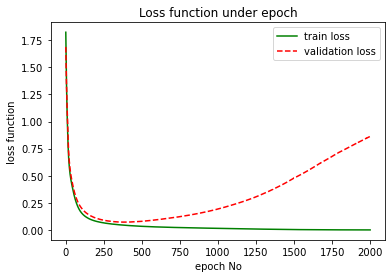

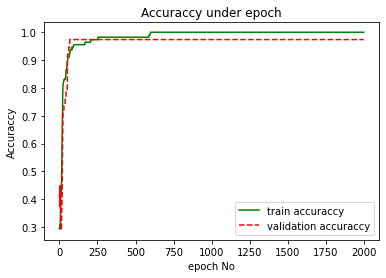

train accuraccy after 2000 epochs:1.0
test accuraccy after 2000 epochs:0.9736841917037964
train accuraccy after 350 epochs:0.98214287
test accuraccy after 350 epochs:0.9736841917037964


In [7]:
#Валидационная кривая 
model, history = create_and_fit_1layerPerceptron(X_train, dummy_y_train, X_test, dummy_y_test, 2000)

plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['val_loss'], 'r--')
plt.legend(['train loss', 'validation loss'])
plt.title('Loss function under epoch')
plt.xlabel('epoch No')
plt.ylabel('loss function')
plt.show()

plt.plot(history.epoch, history.history['accuracy'], 'g')
plt.plot(history.epoch, history.history['val_accuracy'], 'r--')
plt.legend(['train accuraccy', 'validation accuraccy'])
plt.title('Accuraccy under epoch')
plt.xlabel('epoch No')
plt.ylabel('Accuraccy')
plt.show()

print('train accuraccy after 2000 epochs:' + str(history.history['accuracy'][-1]))
print('test accuraccy after 2000 epochs:' + str(history.history['val_accuracy'][-1]))

print('train accuraccy after 350 epochs:' + str(history.history['accuracy'][350]))
print('test accuraccy after 350 epochs:' + str(history.history['val_accuracy'][350]))

In [8]:
#Сравнение лин классификатора и персептрона 
y_test_true_names = [iris.target_names[x] for x in y_test]
y_test_pred_names = [iris.target_names[x] for x in clf.predict(X_test)]

print('linear classificator\n')
print(metrics.classification_report(y_test_true_names, y_test_pred_names, digits=3))



clear_session()
model, history = create_and_fit_1layerPerceptron(X_train, dummy_y_train, X_test, dummy_y_test,epochs=2000, n_neurons=10)
print('\n\n\n1 layer perceptron with 10 neurons\n')
print(metrics.classification_report(y_test_true_names, 
                                    [iris.target_names[x] for x in model.predict_classes(X_test)],
                                    digits=3))


linear classificator

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        13
  versicolor      1.000     0.938     0.968        16
   virginica      0.900     1.000     0.947         9

    accuracy                          0.974        38
   macro avg      0.967     0.979     0.972        38
weighted avg      0.976     0.974     0.974        38




1 layer perceptron with 10 neurons

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        13
  versicolor      1.000     0.938     0.968        16
   virginica      0.900     1.000     0.947         9

    accuracy                          0.974        38
   macro avg      0.967     0.979     0.972        38
weighted avg      0.976     0.974     0.974        38



In [9]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

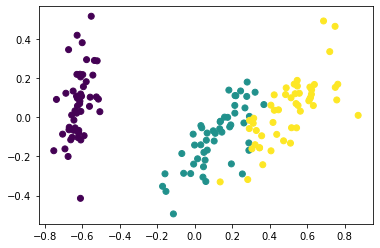

In [10]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    
    lx, ly = x_max - x_min, y_max - y_min
    h = max(lx, ly) / 1000
    k = 40*h
    x_plot_adjust = 20*h
    y_plot_adjust = 20*h
    
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    try:
        P = clf.predict_classes(np.c_[x2.ravel(), y2.ravel()])
    except:
        P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

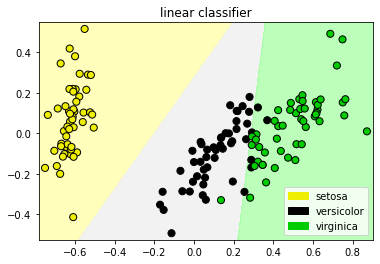

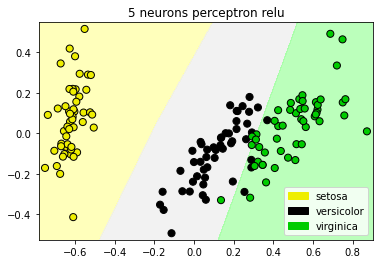

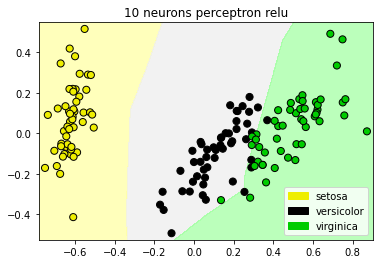

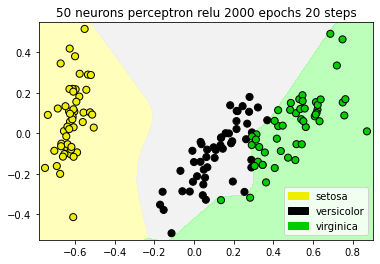

In [12]:
#Картинка для линейного классификатора 
clf = LinearSVC(random_state=0, penalty='l2', C=100.0,  max_iter=10**6); clf.fit(X_pca, y)
plot_class_regions_for_classifier(clf, X_pca, y, title='linear classifier', target_names=iris.target_names, )

y_dummy = np_utils.to_categorical(y)

#Три картинки для перцептрона 
model, history = create_and_fit_1layerPerceptron(X_pca, y_dummy, X_pca, y_dummy, 1000, 5)
plot_class_regions_for_classifier(model, X_pca, y, title='5 neurons perceptron relu', target_names=iris.target_names)

model, history = create_and_fit_1layerPerceptron(X_pca, y_dummy, X_pca, y_dummy, 1000, 10)
plot_class_regions_for_classifier(model, X_pca, y, title='10 neurons perceptron relu', target_names=iris.target_names)

model, history = create_and_fit_1layerPerceptron(X_pca, y_dummy, X_pca, y_dummy, 2000, 50, steps=20)
plot_class_regions_for_classifier(model, X_pca, y, 
                                  title='50 neurons perceptron relu 2000 epochs 20 steps',
                                  target_names=iris.target_names)